# #PROJECT TITLE: AVIATION VENTURE RISK NALYSIS

Please fill out:
* Student Name:Fredrick Nzioka Nzeve 
* Student Pace: Part time-PT12
* Scheduled Project review date/time: 
* Instructor Name: Fidelis Wanalwenge
* Blog post URL:


 # Problem Description:
Our company is expanding in to new industries to diversify its portfolio. Specifically, they are interested in purchasing and operating airplanes for commercial and private enterprises, but do not know anything about the potential risks of aircraft. I am charged with determining which aircrafts are the lowest risk for the company to start this new business endeavor. These findings  shall be translated into actionable insights that the head of the new aviation division can use to help decide which aircraft to purchase.


# Exploratory Data Analysis(EDA)
This Notebook analysis data from the National Transportation Safety Board that includes aviation accident data from 1962 to 2023 about civil aviation accidents and selected incidents in the United States and international waters.

In [1]:
#Importing all necessary Libraries for data cleaning, analysis and visualization.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# Loading the data into jupyter notebook and assigning df as a variable
# Reading the first five lines to get an overview of the data.
df = pd.read_csv("Aviation_Data.csv")
df.head()


C:\Users\USER\anaconda3\Conda Install\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


After running the code in the above cell, it is now clear that the dataset contains Not number values(NaN) which may hinder us while performing data analysis.

In [3]:
#This code confimrs the number of rows and columns within the data frame.
df.shape


(90348, 31)

In [4]:
#Thi code shows the different data types within the data frame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

# Data Cleaning

In [5]:
#This code gives an overview of the columns within the data frame.
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

From the above Code, it is clear that . (full stop) is used as a separater.

In [6]:
# To  replace "." as the separater within columns names
#eg 'Event.Id with a more presentable separator "_".
df.columns = df.columns.str.strip().str.replace(".","_")  
df.columns

Index(['Event_Id', 'Investigation_Type', 'Accident_Number', 'Event_Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport_Code',
       'Airport_Name', 'Injury_Severity', 'Aircraft_damage',
       'Aircraft_Category', 'Registration_Number', 'Make', 'Model',
       'Amateur_Built', 'Number_of_Engines', 'Engine_Type', 'FAR_Description',
       'Schedule', 'Purpose_of_flight', 'Air_carrier', 'Total_Fatal_Injuries',
       'Total_Serious_Injuries', 'Total_Minor_Injuries', 'Total_Uninjured',
       'Weather_Condition', 'Broad_phase_of_flight', 'Report_Status',
       'Publication_Date'],
      dtype='object')

In [7]:
df.head() #To confirm that the "." has been replaced by an "_" in the column names.

,Event_Id,Investigation_Type,Accident_Number,Event_Date,Location,Country,Latitude,Longitude,Airport_Code,Airport_Name,...,Purpose_of_flight,Air_carrier,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_phase_of_flight,Report_Status,Publication_Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [8]:
df.info() #This code outlines the different data types within the data Frame.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event_Id                88889 non-null  object 
 1   Investigation_Type      90348 non-null  object 
 2   Accident_Number         88889 non-null  object 
 3   Event_Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport_Code            50249 non-null  object 
 9   Airport_Name            52790 non-null  object 
 10  Injury_Severity         87889 non-null  object 
 11  Aircraft_damage         85695 non-null  object 
 12  Aircraft_Category       32287 non-null  object 
 13  Registration_Number     87572 non-null  object 
 14  Make                    88826 non-null

Observation: 1. From the above output,it is clear that there are some columns with missing values(Null Values).
             2. The data set contains 90348 rows and 31 columns.
             3. It is also outlines the different data types with key observation that Event_Date and Publication_Dates are                     presented as object types.

In [9]:
df.isnull()        #This code tests whether there are null values within the data frame.

,Event_Id,Investigation_Type,Accident_Number,Event_Date,Location,Country,Latitude,Longitude,Airport_Code,Airport_Name,...,Purpose_of_flight,Air_carrier,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_phase_of_flight,Report_Status,Publication_Date
0,False,False,False,False,False,False,True,True,True,True,...,False,True,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,True,True,True,True,...,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True,True,...,False,True,False,True,True,True,False,False,False,False
3,False,False,False,False,False,False,True,True,True,True,...,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,True,True,True,...,False,True,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90343,False,False,False,False,False,False,True,True,True,True,...,False,True,False,False,False,False,True,True,True,False
90344,False,False,False,False,False,False,True,True,True,True,...,True,True,False,False,False,False,True,True,True,True
90345,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,True,True,False
90346,False,False,False,False,False,False,True,True,True,True,...,False,False,False,False,False,False,True,True,True,True


In [10]:
df.isnull().sum()  #This code counts the number of null values within the data frame.

Event_Id                   1459
Investigation_Type            0
Accident_Number            1459
Event_Date                 1459
Location                   1511
Country                    1685
Latitude                  55966
Longitude                 55975
Airport_Code              40099
Airport_Name              37558
Injury_Severity            2459
Aircraft_damage            4653
Aircraft_Category         58061
Registration_Number        2776
Make                       1522
Model                      1551
Amateur_Built              1561
Number_of_Engines          7543
Engine_Type                8536
FAR_Description           58325
Schedule                  77766
Purpose_of_flight          7651
Air_carrier               73700
Total_Fatal_Injuries      12860
Total_Serious_Injuries    13969
Total_Minor_Injuries      13392
Total_Uninjured            7371
Weather_Condition          5951
Broad_phase_of_flight     28624
Report_Status              7840
Publication_Date          16689
dtype: i

From the above code output, it is clear that almost all columns have atleast a missing value.
To avoid the bias that comes along with dropping data from the main dataset, We shall retain the data set as it is.

In [11]:
df.isnull().sum().sort_values(ascending=False)  #This counts the number of null values while arranging the columns in a the descending order.

Schedule                  77766
Air_carrier               73700
FAR_Description           58325
Aircraft_Category         58061
Longitude                 55975
Latitude                  55966
Airport_Code              40099
Airport_Name              37558
Broad_phase_of_flight     28624
Publication_Date          16689
Total_Serious_Injuries    13969
Total_Minor_Injuries      13392
Total_Fatal_Injuries      12860
Engine_Type                8536
Report_Status              7840
Purpose_of_flight          7651
Number_of_Engines          7543
Total_Uninjured            7371
Weather_Condition          5951
Aircraft_damage            4653
Registration_Number        2776
Injury_Severity            2459
Country                    1685
Amateur_Built              1561
Model                      1551
Make                       1522
Location                   1511
Event_Date                 1459
Accident_Number            1459
Event_Id                   1459
Investigation_Type            0
dtype: i

This above code output shows that schedule_column has the missing values while Investigation_Type has no missing value.

# Dropping of Columns, filling and replacing missing values

Dropping Unwanted Columns

In [12]:
df.drop(["Airport_Code", "Airport_Name"], axis = 1, inplace = True) #Dropping Columns of less importance in data analysis

In [13]:
df.drop(['Schedule', 'Air_carrier', 'FAR_Description', 'Aircraft_Category', 'Latitude', 'Longitude'], axis=1, inplace=True)#Dropping Columns of less importance in data analysis

Filling Missing Values in columns

In [14]:
df.columns

Index(['Event_Id', 'Investigation_Type', 'Accident_Number', 'Event_Date',
       'Location', 'Country', 'Injury_Severity', 'Aircraft_damage',
       'Registration_Number', 'Make', 'Model', 'Amateur_Built',
       'Number_of_Engines', 'Engine_Type', 'Purpose_of_flight',
       'Total_Fatal_Injuries', 'Total_Serious_Injuries',
       'Total_Minor_Injuries', 'Total_Uninjured', 'Weather_Condition',
       'Broad_phase_of_flight', 'Report_Status', 'Publication_Date'],
      dtype='object')

In [15]:
df["Total_Fatal_Injuries"] = df["Total_Fatal_Injuries"].fillna(0.0)
df["Total_Serious_Injuries"] = df["Total_Serious_Injuries"].fillna(0.0)
df["Total_Minor_Injuries"] = df["Total_Minor_Injuries"].fillna(0.0)  #This code fills all the blank spaces with 0 assuming that the missing values translate to nill injury
df["Total_Uninjured"] = df["Total_Uninjured"].fillna(0.0)

In [16]:
df["Engine_Type"] = df["Engine_Type"].fillna("Unknown")
df["Purpose_of_flight"] = df["Purpose_of_flight"].fillna("Unknown")  #This code replaces all missing values with "Unkown to be more realistic.
df["Weather_Condition"] = df["Weather_Condition"].fillna("Unknown")
df["Aircraft_damage"] = df["Aircraft_damage"].fillna("Unknown")
df["Registration_Number"] = df["Registration_Number"].fillna("Unknown")
df["Injury_Severity"] = df["Injury_Severity"].fillna("Unknown")
df["Country"] = df["Country"].fillna("Unknown")
df["Amateur_Built"] = df["Amateur_Built"].fillna("Unknown")
df["Model"] = df["Model"].fillna("Unknown")
df["Make"] = df["Make"].fillna("Unknown")
df["Location"] = df["Location"].fillna("Unknown")
df["Report_Status"] = df["Report_Status"].fillna("Unknown")
df["Broad_phase_of_flight"] = df["Broad_phase_of_flight"].fillna("Unknown")


Printing first 15 dates to have an overview of date format.

In [17]:
print(df["Event_Date"])

0        1948-10-24
1        1962-07-19
2        1974-08-30
3        1977-06-19
4        1979-08-02
            ...    
90343    2022-12-26
90344    2022-12-26
90345    2022-12-26
90346    2022-12-26
90347    2022-12-29
Name: Event_Date, Length: 90348, dtype: object


The below cell confirms the Event_Date data type

In [18]:
print(df['Event_Date'].dtype)  

object


In [19]:
print(df['Event_Date'].sample(15))  # This code Randomly picks a sample of 15 date values, run severally to confirm whether there may be missing dates 

86154           NaN
30019    1992-03-14
49625    2000-10-27
74749    2013-11-30
16251    1986-11-05
2095     1982-07-24
21900    1988-11-14
89316    2022-06-07
18301    1987-08-04
58029    2005-01-05
62819    2007-06-29
10154    1984-10-27
9602     1984-08-31
79797    2016-11-23
22618    1989-03-26
Name: Event_Date, dtype: object


After running the above code severally based on the provided sample, it is now clear that rows 83592,84900,79038 contain null values.

Replacing the missing date values with a common date "2020-20-20"

In [20]:
# Step 1: Converting to datetime while forcing invalid ones to NaT
df["Event_Date"] = pd.to_datetime(df["Event_Date"], errors="coerce")

# Step 2: Replacing only the NaT values with a placeholder
df["Event_Date"] = df["Event_Date"].fillna(pd.Timestamp("2000-02-20"))


In [21]:
print("Replaced missing dates:", (df["Event_Date"] == "2000-02-20").sum()) #This code confirms whether the replacement has taken place

Replaced missing dates: 1464


In [22]:
df.isnull().sum().sort_values(ascending=False)  #This code confirms the data cleaning progress.

Publication_Date          16689
Number_of_Engines          7543
Accident_Number            1459
Event_Id                   1459
Total_Uninjured               0
Registration_Number           0
Investigation_Type            0
Broad_phase_of_flight         0
Event_Date                    0
Location                      0
Country                       0
Injury_Severity               0
Aircraft_damage               0
Make                          0
Total_Minor_Injuries          0
Model                         0
Report_Status                 0
Weather_Condition             0
Engine_Type                   0
Purpose_of_flight             0
Total_Fatal_Injuries          0
Total_Serious_Injuries        0
Amateur_Built                 0
dtype: int64

In [23]:

# Filling missing engine counts with the general average number of engines per aircraft in the industry.
df["Number_of_Engines"] = df["Number_of_Engines"].fillna(0)
#Dropping Publication_Date column
df.drop(['Publication_Date', 'Event_Id','Accident_Number'],axis=1, inplace=True)

In [24]:
#Checking the cleanup progress
df.isnull().sum().sort_values(ascending=False)

Report_Status             0
Broad_phase_of_flight     0
Event_Date                0
Location                  0
Country                   0
Injury_Severity           0
Aircraft_damage           0
Registration_Number       0
Make                      0
Model                     0
Amateur_Built             0
Number_of_Engines         0
Engine_Type               0
Purpose_of_flight         0
Total_Fatal_Injuries      0
Total_Serious_Injuries    0
Total_Minor_Injuries      0
Total_Uninjured           0
Weather_Condition         0
Investigation_Type        0
dtype: int64

From the above output, it is now clear that the data is now cleaned and we not not have any missing values.

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Investigation_Type      90348 non-null  object        
 1   Event_Date              90348 non-null  datetime64[ns]
 2   Location                90348 non-null  object        
 3   Country                 90348 non-null  object        
 4   Injury_Severity         90348 non-null  object        
 5   Aircraft_damage         90348 non-null  object        
 6   Registration_Number     90348 non-null  object        
 7   Make                    90348 non-null  object        
 8   Model                   90348 non-null  object        
 9   Amateur_Built           90348 non-null  object        
 10  Number_of_Engines       90348 non-null  float64       
 11  Engine_Type             90348 non-null  object        
 12  Purpose_of_flight       90348 non-null  object

In [26]:
df.to_csv("Cleaned_Aviation_Data.csv", index=False)  #Saving a copy of the cleaned data for further analysis.

# Data Aggregations using pivot table and groupby method


In [27]:
grouped_data_by_Injuries = df.groupby(["Make"])[["Total_Fatal_Injuries","Total_Serious_Injuries", "Total_Minor_Injuries", "Total_Uninjured"  ]].agg(["mean", "min", "max"])
grouped_data_by_Injuries

Total_Fatal_Injuries            \
                                         mean  min  max   
Make                                                      
107.5 Flying Corporation             1.000000  1.0  1.0   
1200                                 0.000000  0.0  0.0   
177MF LLC                            0.000000  0.0  0.0   
1977 Colfer-chan                     0.000000  0.0  0.0   
1st Ftr Gp                           1.000000  1.0  1.0   
...                                       ...  ...  ...   
Zukowski                             0.000000  0.0  0.0   
Zwart                                0.000000  0.0  0.0   
de Havilland                         0.222222  0.0  2.0   
drone                                0.000000  0.0  0.0   
unknown                              0.000000  0.0  0.0   

                         Total_Serious_Injuries            \
                                           mean  min  max   
Make                                                        
107.5 Flying Corporation               0.000000  0.0  0.0   
1200                                   1.000000  1.0  1.0   
177MF LLC                              2.000000  2.0  2.0   
1977 Colfer-chan                       0.000000  0.0  0.0   
1st Ftr Gp                             0.000000  0.0  0.0   
...                                         ...  ...  ...   
Zukowski                               0.000000  0.0  0.0   
Zwart                                  0.000000  0.0  0.0   
de Havilland                           0.444444  0.0  3.0   
drone                                  0.000000  0.0  0.0   
unknown                                0.000000  0.0  0.0   

                         Total_Minor_Injuries           Total_Uninjured       \
                                         mean  min  max            mean  min   
Make                                                                           
107.5 Flying Corporation             0.000000  0.0  0.0        0.000000  0.0   
1200                                 0.000000  0.0  0.0        0.000000  0.0   
177MF LLC                            0.000000  0.0  0.0        0.000000  0.0   
1977 Colfer-chan                     1.000000  1.0  1.0        0.000000  0.0   
1st Ftr Gp                           0.000000  0.0  0.0        0.000000  0.0   
...                                       ...  ...  ...             ...  ...   
Zukowski                             0.000000  0.0  0.0        1.000000  1.0   
Zwart                                0.000000  0.0  0.0        2.000000  2.0   
de Havilland                         0.111111  0.0  1.0        5.777778  0.0   
drone                                0.000000  0.0  0.0        0.000000  0.0   
unknown                              1.000000  1.0  1.0        0.000000  0.0   

                                
                           max  
Make                            
107.5 Flying Corporation   0.0  
1200                       0.0  
177MF LLC                  0.0  
1977 Colfer-chan           0.0  
1st Ftr Gp                 0.0  
...                        ...  
Zukowski                   1.0  
Zwart                      2.0  
de Havilland              20.0  
drone                      0.0  
unknown                    0.0  

[8237 rows x 12 columns]

Fron the above pivot table, we can comprehend that;
1. Based on the first few makes, Whenever an aircraft of de Havilland and DC3,DHC-6-200 and DHC-8-202 models was involved in an accident, most passengers went un-injured.


In [28]:
grouped_data_by_Injuries = df.groupby(["Model"])[["Total_Fatal_Injuries","Total_Serious_Injuries", "Total_Minor_Injuries", "Total_Uninjured"  ]].agg(["mean", "min", "max"])
grouped_data_by_Injuries

Total_Fatal_Injuries           Total_Serious_Injuries       \
                                   mean  min  max                   mean  min   
Model                                                                           
&GCBC                               0.0  0.0  0.0                    0.0  0.0   
(EX) RV-6                           2.0  2.0  2.0                    0.0  0.0   
(MODIFIED)                          1.0  1.0  1.0                    0.0  0.0   
(SOLOY CONVERSION)                  0.0  0.0  0.0                    0.0  0.0   
-269C                               0.0  0.0  0.0                    0.0  0.0   
...                                 ...  ...  ...                    ...  ...   
lebed                               2.0  2.0  2.0                    0.0  0.0   
none                                1.0  1.0  1.0                    1.0  1.0   
sportstar                           0.0  0.0  0.0                    0.0  0.0   
unk                                 0.0  0.0  0.0                    1.0  1.0   
unknown                             1.0  1.0  1.0                    0.0  0.0   

                        Total_Minor_Injuries           Total_Uninjured       \
                    max                 mean  min  max            mean  min   
Model                                                                         
&GCBC               0.0                  0.0  0.0  0.0             2.0  2.0   
(EX) RV-6           0.0                  0.0  0.0  0.0             0.0  0.0   
(MODIFIED)          0.0                  0.0  0.0  0.0             0.0  0.0   
(SOLOY CONVERSION)  0.0                  0.0  0.0  0.0             1.0  1.0   
-269C               0.0                  0.0  0.0  0.0             1.0  1.0   
...                 ...                  ...  ...  ...             ...  ...   
lebed               0.0                  0.0  0.0  0.0             0.0  0.0   
none                1.0                  0.0  0.0  0.0             0.0  0.0   
sportstar           0.0                  0.0  0.0  0.0             2.0  2.0   
unk                 1.0                  1.0  1.0  1.0             0.0  0.0   
unknown             0.0                  0.0  0.0  0.0             0.0  0.0   

                         
                    max  
Model                    
&GCBC               2.0  
(EX) RV-6           0.0  
(MODIFIED)          0.0  
(SOLOY CONVERSION)  1.0  
-269C               1.0  
...                 ...  
lebed               0.0  
none                0.0  
sportstar           2.0  
unk                 0.0  
unknown             0.0  

[12318 rows x 12 columns]

Observations
1. From the above grouped data, it is observable from the few rows that whenever (EX) RV-6 model and lebed model were involved in an accident, Fatalities were reported
2.sportstar and &GCBC Models reported non injuries.

In [29]:
grouped_data = df.groupby(["Model"])[["Total_Fatal_Injuries", "Total_Serious_Injuries", "Total_Minor_Injuries", "Total_Uninjured", ]].agg(["sum"])
grouped_data

,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured
,sum,sum,sum,sum
Model,,,,
&GCBC,0.0,0.0,0.0,2.0
(EX) RV-6,2.0,0.0,0.0,0.0
(MODIFIED),1.0,0.0,0.0,0.0
(SOLOY CONVERSION),0.0,0.0,0.0,1.0
-269C,0.0,0.0,0.0,1.0
...,...,...,...,...
lebed,2.0,0.0,0.0,0.0
none,1.0,1.0,0.0,0.0


Observations
1. From the above grouped data, it indicates that models (EX) RV-6 and lebed reported the highest number of fatalities.
2. It is also clear that &GCBC and sportstar reported the most non injuries.

In [30]:
df.columns

Index(['Investigation_Type', 'Event_Date', 'Location', 'Country',
       'Injury_Severity', 'Aircraft_damage', 'Registration_Number', 'Make',
       'Model', 'Amateur_Built', 'Number_of_Engines', 'Engine_Type',
       'Purpose_of_flight', 'Total_Fatal_Injuries', 'Total_Serious_Injuries',
       'Total_Minor_Injuries', 'Total_Uninjured', 'Weather_Condition',
       'Broad_phase_of_flight', 'Report_Status'],
      dtype='object')

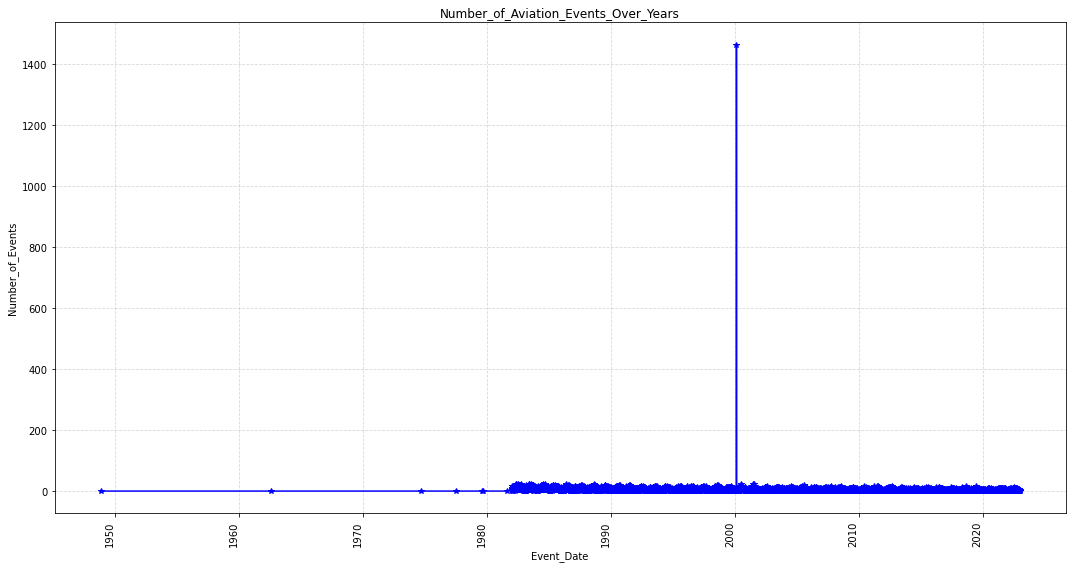

In [31]:
plt.figure(figsize=(15, 8))
df["Event_Date"].value_counts().sort_index().plot(kind="line", marker="*", color="blue")
plt.title("Number_of_Aviation_Events_Over_Years")
plt.xlabel("Event_Date")
plt.ylabel("Number_of_Events")
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


From the above plot, there seems to have happened a serious accident in the year 2000. However, since we replaced the missing values in date column with 2000, this justifies the phenomenon. This could be misleading in a way.

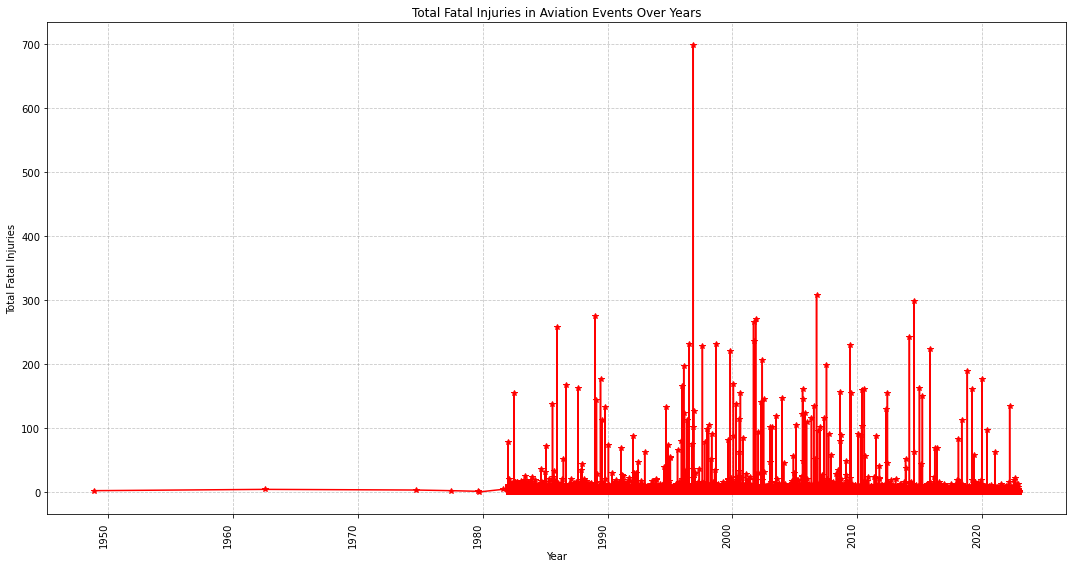

In [32]:
fatalities_by_year = df.groupby("Event_Date")["Total_Fatal_Injuries"].sum()
plt.figure(figsize=(15, 8))
fatalities_by_year.plot(kind='line', marker='*', color='red')
plt.title("Total Fatal Injuries in Aviation Events Over Years")
plt.xlabel('Year')
plt.ylabel('Total Fatal Injuries')
plt.grid(True, linestyle="--",alpha=0.7)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Again, it is clear that the replecement of missing date with year 2000 and filling the missing values with 2 is bringing about outliers which could mislead in a way.It is observable that aircraft accident cases leading to injuries remained low between 1950 to 1980. There was a rise in the number of accidents leading to injuries reported between the year 1980 to 2023.

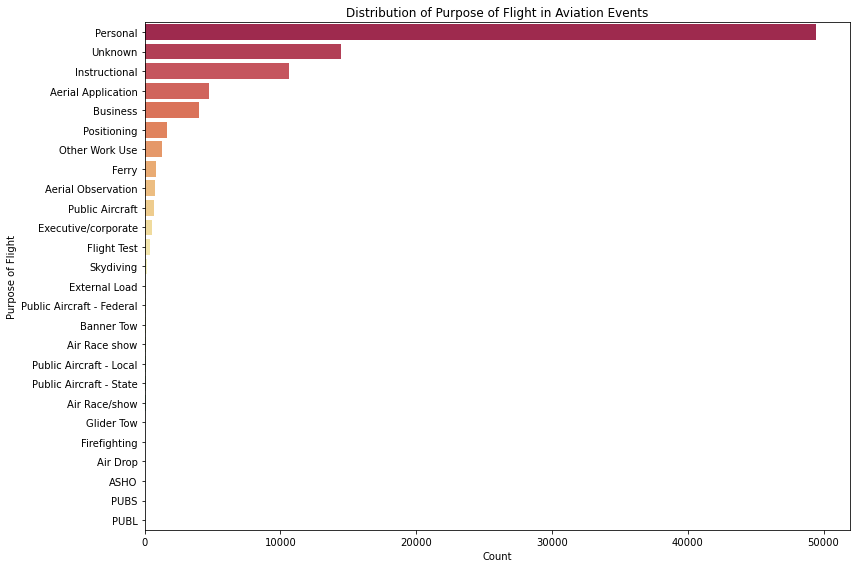

In [33]:
#Purpose of flight Distribution
plt.figure(figsize=(12, 8))
sns.countplot(y="Purpose_of_flight", data=df, order=df["Purpose_of_flight"].value_counts().index, palette="Spectral")
plt.title("Distribution of Purpose of Flight in Aviation Events")
plt.xlabel('Count')
plt.ylabel("Purpose of Flight")
plt.tight_layout()
plt.show()

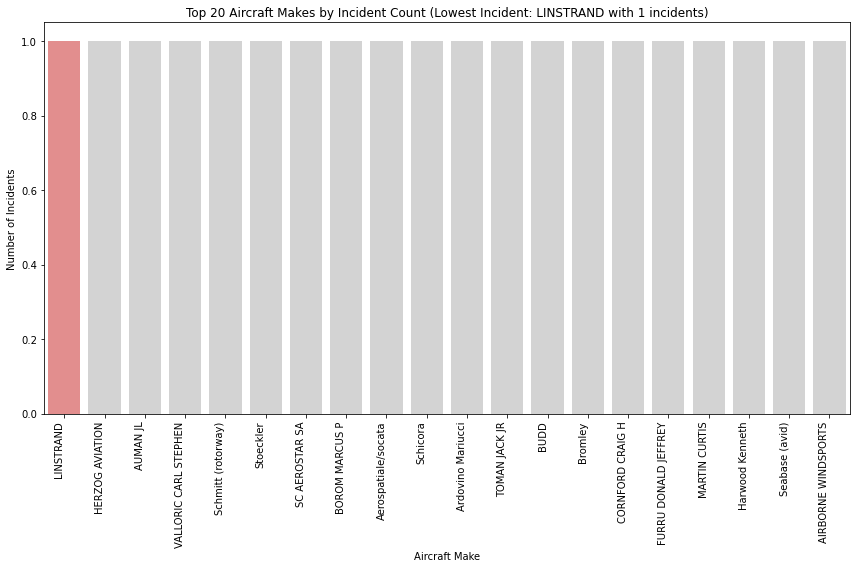

The aircraft make with the lowest number of incidents is: LINSTRAND with 1 incidents.


In [34]:
df = pd.read_csv('Cleaned_Aviation_Data.csv')

df = pd.read_csv('Cleaned_Aviation_Data.csv')

# Count incidents per aircraft make
make_counts = df['Make'].value_counts().reset_index()
make_counts.columns = ['Make', 'Incident_Count']

# Exclude 'Unknown' make for this analysis
filtered_make_counts = make_counts[make_counts['Make'] != 'Unknown']

# Sort makes by incident count in ascending order
sorted_makes = filtered_make_counts.sort_values(by='Incident_Count', ascending=True)

# Identify the 'best' aircraft (lowest incident count)
best_aircraft = sorted_makes.iloc[0]

# For visualization, let's consider the top N aircraft by incident count,
# ensuring the 'best' aircraft is included if it's not already in the top N (though it should be the lowest).
# We'll display top 20 for better visualization.
top_n = 20
makes_to_plot = sorted_makes.head(top_n)

# Create a color list for the bars
colors = ['lightgrey' if make != best_aircraft['Make'] else 'lightcoral' for make in makes_to_plot['Make']]

# Create the bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='Make', y='Incident_Count', data=makes_to_plot, palette=colors)
plt.title(f'Top {top_n} Aircraft Makes by Incident Count (Lowest Incident: {best_aircraft["Make"]} with {int(best_aircraft["Incident_Count"])} incidents)')
plt.xlabel('Aircraft Make')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.savefig('best_aircraft_bar_chart.png')
plt.show()

print(f"The aircraft make with the lowest number of incidents is: {best_aircraft['Make']} with {int(best_aircraft['Incident_Count'])} incidents.")
